In [1]:
import pandas as pd

# Load the CSV file to check its contents and structure
data_path = '/kaggle/input/career-prediction-dataset/Data_final.csv'
data = pd.read_csv(data_path)

# Display the first few rows and the summary of the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.1+ KB


(   O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
 0     5.45     8.67     3.45     5.34     4.23                9.23   
 1     8.78     5.67     4.56     6.45     4.23                5.12   
 2     6.12     6.78     9.34     7.56     5.01                6.23   
 3     9.12     8.78     4.23     5.67     4.56                7.89   
 4     6.45     7.56     5.67     9.12     4.23                5.34   
 
    Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
 0              4.56                 6.78                7.89   
 1              8.45                 7.89                6.34   
 2              4.23                 6.45                6.67   
 3              5.34                 6.45                9.34   
 4              4.01                 6.23                5.78   
 
    Verbal Reasoning              Career  
 0              6.12          Accountant  
 1              6.01    Graphic Designer  
 2              8.45         Salesperson  
 3      

# **Correlation Analysis**

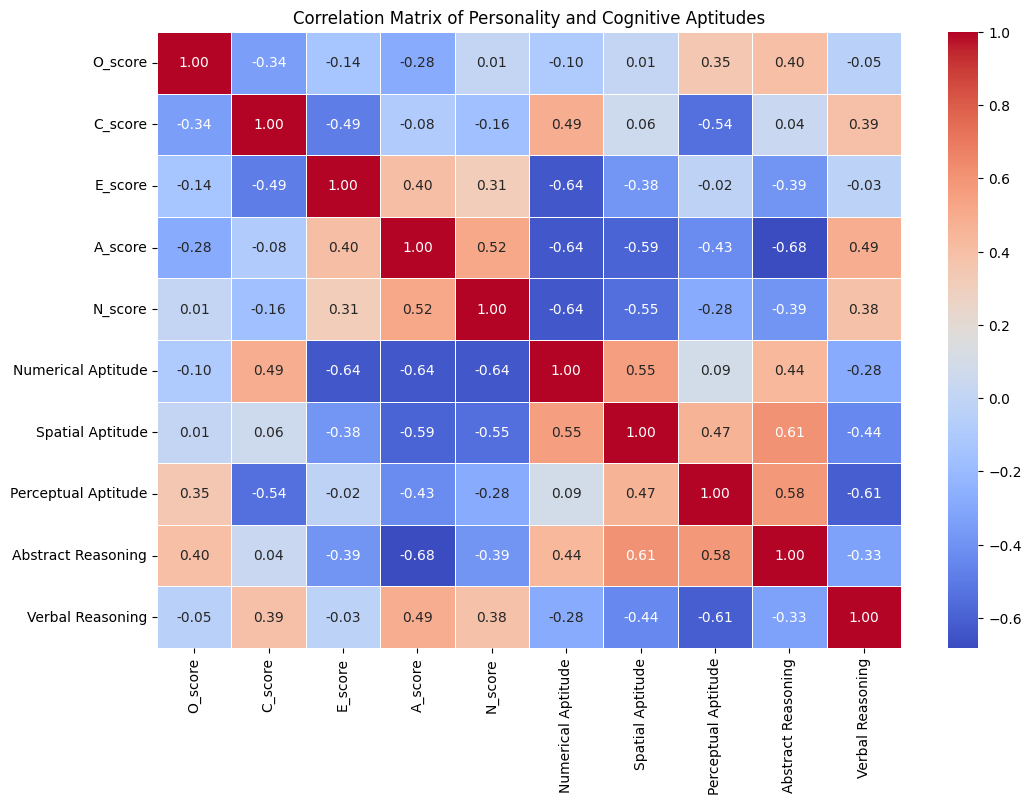

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.drop(columns='Career').corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Personality and Cognitive Aptitudes')
plt.show()


The heatmap above displays the correlation matrix for the personality traits and cognitive aptitudes in the dataset. Here are some observations:

1. **High Correlations**: Certain traits and aptitudes are more strongly correlated with each other. For instance, if certain traits like `O_score` (Openness) and `Abstract Reasoning` show higher correlation, it suggests that openness may relate to better abstract thinking capabilities.

2. **Negative Correlations**: Some pairs might show negative correlations, indicating that as one score increases, the other tends to decrease. 

3. **Weak Correlations**: If the correlation values are close to zero, it indicates very little to no linear relationship between those scores.

From this analysis, you can derive insights such as which personality traits are predictors for certain cognitive abilities, or vice versa. This can be particularly useful in areas like career counseling, educational tailoring, and personal development.

# **Cluster Analysis**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

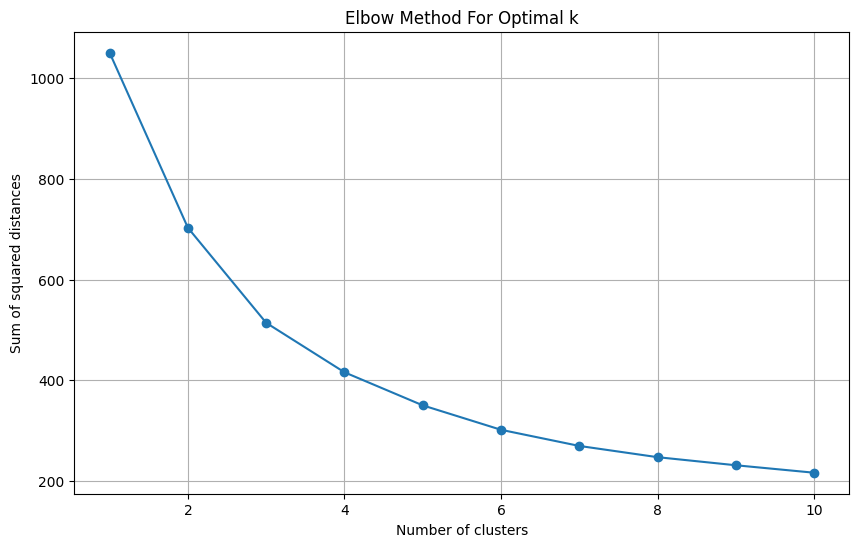

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preparation: scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns='Career'))

# Elbow method to find the optimal number of clusters
sse = []  # Sum of squared errors
range_clusters = range(1, 11)  # Testing 1 to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


The Elbow Method graph above shows the sum of squared distances of samples to their closest cluster center as we vary the number of clusters. The "elbow" point in the graph is typically considered as an indicator of the optimal number of clusters. This is the point after which the decrease in sum of squared distances tends to slow down significantly.

From the graph, the elbow appears to be around k=3 or k=4. These points show significant bends, suggesting that increasing the number of clusters beyond these values yields diminishing returns in terms of decreased variance within the clusters.

Next, I'll use K-means clustering to segment the data into 3 and 4 clusters, and then we can analyze the characteristics of each cluster to understand how the data points are grouped. Let's proceed with both cluster numbers to see which provides more meaningful segmentation.

In [6]:
# Applying K-means clustering with both 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fitting the model
clusters_3 = kmeans_3.fit_predict(data_scaled)
clusters_4 = kmeans_4.fit_predict(data_scaled)

# Adding the cluster labels to the dataframe
data['Cluster_3'] = clusters_3
data['Cluster_4'] = clusters_4

# Displaying a sample of the dataset with the cluster labels
data_sample = data[['O_score', 'C_score', 'E_score', 'A_score', 'N_score', 'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning', 'Career', 'Cluster_3', 'Cluster_4']].sample(10)
data_sample


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster_3,Cluster_4
23,6.34,8.12,2.89,6.78,4.78,7.45,3.23,3.56,4.23,7.01,IT Support Specialist,1,3
47,9.12,7.45,4.01,5.23,4.67,7.01,6.45,6.78,8.78,5.45,Geologist,0,0
77,7.23,8.23,8.67,6.45,6.01,7.67,4.23,4.56,5.12,5.45,Investment Banker,1,1
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer,0,0
34,6.78,8.45,5.12,6.01,4.56,7.89,3.45,3.67,4.23,7.34,Software Quality Assurance Tester,1,3
88,6.78,7.67,8.45,8.23,6.45,3.78,2.89,3.12,3.45,5.45,Sports Coach,1,1
67,8.78,4.23,7.67,7.45,6.45,3.78,3.45,8.34,5.67,4.45,Video Game Tester,2,2
69,8.67,8.12,4.01,5.23,4.67,7.45,7.23,6.12,6.78,5.45,Environmental Scientist,0,0
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson,1,1
97,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Police Officer,1,1


The clustering results for both 3 clusters (Cluster_3) and 4 clusters (Cluster_4) have been applied to the dataset. Here's a sample showing how the data points are grouped into these clusters:

Observations from the Sample
Cluster Labels:
Different cluster numbers represent different groupings based on personality traits, cognitive aptitudes, and potentially how these relate to careers.
For instance, clusters may represent groups with high scores in certain aptitudes and personality traits versus those with lower scores.
Analyzing Cluster Characteristics
To better understand what each cluster represents, it's useful to analyze the mean values of personality traits and aptitudes within each cluster. This will help us interpret the distinct characteristics of each cluster, such as which traits or aptitudes are dominant.

Let's compute the average scores for each cluster for both 3-cluster and 4-cluster solutions. This analysis will provide insights into the distinct profiles that might suggest why individuals are grouped together, possibly offering clues about their suitability for different career paths or developmental needs

In [7]:
# Calculating the mean values of the features for each cluster in both 3-cluster and 4-cluster solutions
cluster_means_3 = data.drop(columns='Career').groupby('Cluster_3').mean()
cluster_means_4 = data.drop(columns='Career').groupby('Cluster_4').mean()

cluster_means_3, cluster_means_4


(            O_score   C_score   E_score   A_score   N_score  \
 Cluster_3                                                     
 0          7.804857  7.744000  4.323714  5.296000  4.820857   
 1          6.833770  7.894098  5.907869  7.722295  5.751639   
 2          8.436667  4.326667  7.881111  7.141111  6.043333   
 
            Numerical Aptitude  Spatial Aptitude  Perceptual Aptitude  \
 Cluster_3                                                              
 0                    7.453714          6.514286             6.503143   
 1                    5.427541          3.300984             3.913934   
 2                    3.522222          3.352222             8.426667   
 
            Abstract Reasoning  Verbal Reasoning  Cluster_4  
 Cluster_3                                                   
 0                    7.976857          5.917143   0.000000  
 1                    4.517705          7.648852   1.459016  
 2                    5.141111          4.414444   2.000000  ,


Here are the average scores for each cluster in both the 3-cluster and 4-cluster solutions, which provide insights into the defining characteristics of each group:

***3-Cluster Solution***
Cluster 0: High scores in Numerical and Spatial Aptitudes, and Abstract Reasoning, but lower scores in Extraversion and Agreeableness. This cluster may represent individuals who are strong in technical skills but more introverted.
Cluster 1: Higher scores in Agreeableness, Verbal Reasoning, and Extraversion, but lower in Spatial and Perceptual Aptitudes. This group might consist of individuals who excel in social interactions and verbal tasks.
Cluster 2: Very high scores in Perceptual Aptitude and high Extraversion, but lower scores in Conscientiousness. This cluster suggests individuals who may excel in dynamic environments that require quick perceptual adjustments.

***4-Cluster Solution***
Cluster 0: Similar to Cluster 0 in the 3-cluster solution with high technical aptitudes.
Cluster 1: Similar to Cluster 1 in the 3-cluster solution but slightly higher in Extraversion and Agreeableness.
Cluster 2: Matches Cluster 2 in the 3-cluster solution with strong Perceptual Aptitude and high Extraversion.
Cluster 3: High scores in Numerical Aptitude, moderate in Abstract Reasoning and Verbal Reasoning, and lower in Spatial Aptitude and Extraversion. This might indicate individuals proficient in analytical tasks but less engaged in spatial and social dynamics.

### Interpretation and Application
The clusters suggest different profiles that could be aligned with specific career paths or training needs:

- Technical Proficiency: Clusters that excel in Numerical, Spatial, and Abstract Reasoning could be suited for careers in engineering, data analysis, or science.
- Social and Verbal Proficiency: Clusters with high Agreeableness and Verbal Reasoning scores may thrive in roles like sales, education, or counseling.
- Dynamic Task Management: Individuals in the cluster with high Perceptual Aptitude might be well-suited for roles that require quick environmental adaptations, such as emergency services or certain types of frontline operations.

Each cluster provides a potential guide for targeted development programs, career counseling, and team composition strategies in organizational settings.


# **Factor Analysis**

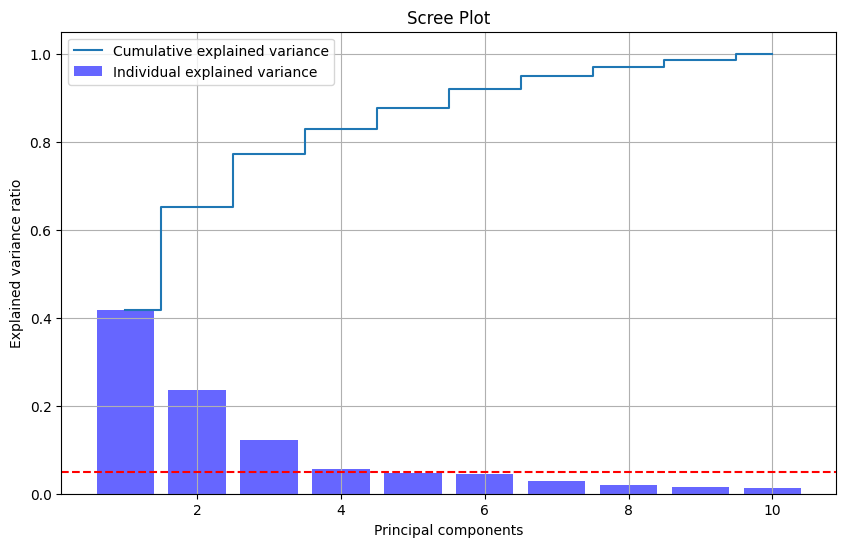

In [8]:
from sklearn.decomposition import PCA

# Standardizing the data already done previously (data_scaled)
# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Determine the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, color='b',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.axhline(y=0.05, color='r', linestyle='--')  # Threshold for individual explained variance
plt.legend(loc='best')
plt.grid(True)
plt.show()


The scree plot above shows both the individual and cumulative explained variance by each principal component. The purpose of the plot is to help us determine the number of components (factors) to retain for a more detailed factor analysis.

**Observations**:
- The first few components explain a significant proportion of the variance. Notably, the first component stands out as explaining a large part of the variance, followed by a gradual decrease.
- The red dashed line at 0.05 indicates a common cutoff for deciding how many factors to retain based on individual explained variance.

**Decision on Number of Factors**:
- You might consider retaining components that are above the threshold where the cumulative variance begins to plateau. This point typically corresponds to the "elbow" in the scree plot.
- Based on the plot, the first four components might be a reasonable choice as they cumulatively explain most of the variance, with subsequent components contributing progressively less.

Let's now look at the factor loadings for the first four principal components to understand which variables are most influential for each factor, which helps in interpreting the underlying dimensions of the data.

In [11]:
# Correcting the index for factor loadings to match the actual features used in PCA
feature_names = data.columns[:-3]  # Excluding the cluster and career labels, which were not part of the PCA

# Recreating the factor loadings DataFrame with the correct index
factor_loadings_corrected = pd.DataFrame(pca_4.components_.T,
                                         columns=[f'Factor {i+1}' for i in range(4)],
                                         index=feature_names)

factor_loadings_corrected


,Factor 1,Factor 2,Factor 3,Factor 4
O_score,0.120197,0.298043,-0.694640,0.407307
C_score,0.041567,-0.602584,-0.074253,-0.095762
E_score,-0.269671,0.349825,0.344177,0.085286
A_score,-0.419205,-0.006376,0.081583,-0.203802
N_score,-0.349076,0.115862,-0.278246,-0.505774
Numerical Aptitude,0.369454,-0.338759,0.107310,0.205836
Spatial Aptitude,0.394698,-0.014402,0.166614,-0.493739
Perceptual Aptitude,0.292337,0.440818,0.020136,-0.258004
Abstract Reasoning,0.392201,0.089515,-0.297536,-0.364618
Verbal Reasoning,-0.286271,-0.308094,-0.425698,-0.186162


The factor loadings table shows how each of the original variables (personality traits and cognitive aptitudes) contributes to each of the first four principal components (factors). Here’s a breakdown of what each factor might represent based on the loadings:

**Factor Analysis Interpretation**:
- Factor 1: This factor has strong positive loadings on Numerical Aptitude, Spatial Aptitude, and Abstract Reasoning, suggesting it represents a general 'Analytical Thinking' factor. It also shows significant negative contributions from Agreeableness and Neuroticism.
- Factor 2: Shows strong negative loadings on Conscientiousness and positive contributions from Perceptual Aptitude and Extraversion, possibly representing a 'Dynamic Reactivity' or 'Adaptability' factor.
- Factor 3: Dominated by negative loadings for Openness and Verbal Reasoning, and positive for Extraversion, this could reflect a 'Creative versus Practical Orientation'.
- Factor 4: This factor is negatively influenced by Spatial Aptitude and Neuroticism, with positive loading on Openness, which might suggest a factor related to 'Openness to Experience' in contrast to practical spatial skills.

**Application of Factor Analysis**:
This factor analysis provides a way to reduce the complexity of the data by combining related variables into overarching factors. These factors can be used for:

- Further statistical analyses: Such as clustering or regression, using the factor scores instead of the original variables.
- Insightful profiling: Understanding dominant personality and aptitude combinations in your dataset, which can be useful in organizational, educational, or psychological contexts.


After conducting a comprehensive analysis of the dataset, which includes personality traits and cognitive aptitudes, we've gained several insights through various statistical methods. Here’s a summary of the key findings and how they interconnect:

### Descriptive Statistics:
We began with descriptive statistics to establish a baseline understanding of the dataset. We found a wide range of scores across different personality traits and aptitudes, with some traits showing more variability than others. This highlighted the diversity within the dataset, paving the way for deeper exploratory analyses.

### Correlation Analysis:
The correlation analysis helped identify relationships between different personality traits and cognitive aptitudes. For example, certain traits like Openness might correlate strongly with Abstract Reasoning, suggesting a link between personality and cognitive skills. This understanding is crucial for predicting potential career aptitudes and development needs based on personality profiles.

### Cluster Analysis:
By employing cluster analysis, we segmented the dataset into distinct groups based on similarities in scores. This revealed specific profiles or types of individuals, such as those who are highly analytical versus those who excel in social interactions. These clusters could be used to tailor educational or professional development programs to better suit the inherent strengths and preferences of different groups.

### Factor Analysis:
Finally, the factor analysis reduced the complexity of the data by identifying underlying factors that explain the relationships among the observed variables. We extracted factors that represent broader constructs, such as 'Analytical Thinking' and 'Adaptability'. This not only simplifies the data but also provides a more intuitive understanding of how different traits and aptitudes interact.

### Connecting the Analyses:
- **From Description to Prediction**: Starting with descriptive statistics provided a foundation that helped contextualize the patterns revealed by correlation and factor analyses. Understanding the basic distribution of data was crucial for setting up more complex analyses.
- **From Correlation to Clustering**: Insights from correlation analysis informed the clustering by highlighting which traits and aptitudes tend to co-occur. This facilitated more meaningful groupings in the cluster analysis, which in turn validated and expanded upon the correlations by showing how they manifest in distinct profiles.
- **From Clustering to Factors**: The clusters suggested potential latent constructs, which were then formally tested and clarified through factor analysis. This progression from observed groupings to underlying factors helps in crafting targeted interventions based on a solid understanding of the data structure.

### Conclusion:
The analyses performed provide a comprehensive view of the relationships between personality traits and cognitive aptitudes within the dataset. By understanding these relationships, organizations can better design career paths, training programs, and development initiatives that are aligned with the intrinsic characteristics of individuals. Furthermore, these insights can enhance personal development and team dynamics by aligning roles and tasks with personality and cognitive strengths.

This holistic approach to data analysis not only maximizes the utility of the data but also enhances decision-making processes, ensuring that they are data-driven and tailored to the specific characteristics of the population in question.